In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np

In [2]:
#Load predefined data 
iris = datasets.load_iris()

In [3]:
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

In [4]:
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [5]:
model = KMeans(n_clusters = 3)
model.fit(x)

KMeans(n_clusters=3)

In [6]:
score1 = sm.accuracy_score(y, model.labels_)
print('Accuracy of k-means = ',score1)

Accuracy of k-means =  0.8933333333333333


In [7]:
plt.figure(figsize = (7,7))
colormap = np.array(['red','lime','black'])

<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'K Mean Classification')

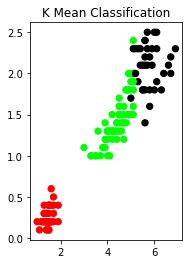

In [8]:
plt.subplot(1,2,1)
plt.scatter(x.Petal_Length, x.Petal_Width, c = colormap[model.labels_], s = 40)
plt.title('K Mean Classification')

In [9]:
scaler = preprocessing.StandardScaler()
scaler.fit(x)
xsa = scaler.transform(x)
xs = pd.DataFrame(xsa, columns = x.columns)

In [10]:
gmm = GaussianMixture(n_components = 3)
gmm.fit(xs)
y_cluster_gmm = gmm.predict(xs)

In [11]:
score2 = sm.accuracy_score(y, y_cluster_gmm)
print('Accuracy of EM = ',score2)

Accuracy of EM =  0.36666666666666664


Text(0.5, 1.0, 'EM Classification')

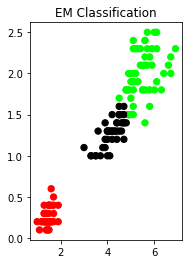

In [12]:
plt.subplot(1,2,2)
plt.scatter(x.Petal_Length, x.Petal_Width, c = colormap[y_cluster_gmm], s = 40)
plt.title('EM Classification')